In [2]:
import sqlite3 as sq
import bs4 as bs
import re
import locale
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os as os
import bs4 as bs
import networkx as nx
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_colwidth = 10000

## Mise en forme du fichier

In [3]:
def clean(x):
    x = x.replace("e╠ü","é")
    x = x.replace("e╠Ç","è")
    x = x.replace("a╠Ç","à")
    x = x.replace("E╠ü","é")
    x = x.replace("ÔÇÖ","'")
    x = x.replace("o╠é","ô")
    x = x.replace("c╠º","c")
    x = x.replace("e╠ê","ë")
    x = x.replace("e╠é","ê")
    x = x.replace("I╠é","I")
    x = x.replace("i╠ê","ï")
    x = x.replace("i╠é","î")
    return x.replace(".htm","")
        

data = {}
l = os.listdir("../../../Thèse/Manuscrit/data/Assises.html")
for i in l:
    with open("../../../Thèse/Manuscrit/data/Assises.html/"+i) as f:
        u = bs.BeautifulSoup(f,"lxml")
        data[clean(i)] = u
print(len(data))
        
#Filtre sur la taille
#for i in [i for i in data if len(data[i].text)>200000]:
#    del data[i]

1280


In [26]:
def is_anr(x):
    x = x.text
    try:
        if pd.isnull(x):
            return False
        if "anr" in x.lower() or "a.n.r" in x.lower() or "agence nationale de la recherche" in x.lower():
            return True
    except:
        print(n)
    return False

In [38]:
contrib_anr = [i for i in data if "agence nationale de la recherche" in data[i].text.lower() or "anr" in data[i].text.lower()]

In [70]:
contrib_projets = [i for i in data if "sur projet" in data[i].text.lower() or "par projet" in data[i].text.lower()]

In [71]:
contrib_projets

245

In [6]:
sb = [(data[i].text.lower().count("anr")/len(data[i].text.split(" ")),data[i].text.lower().count("anr"),i) for i in data if "anr" in data[i].text.lower()]

In [41]:
s = pd.DataFrame(contrib_anr)
s["type"] = None
s["del"] = None
#s.to_excel("out_reco_names.xls")

In [52]:
s = pd.read_excel("out_reco_names.xls")
def reco_type(x):
    if x in ["privé","insti","assises","socciv","administration","politique"]:
        return "others"
    if x in ["socsavantes"]:
        return "recherche"
    return x
s["type_reco"] = s["type"].apply(reco_type)

In [53]:
s["type_reco"].value_counts()

recherche    171
indiv         84
syndic        59
others        41
univ          39
Name: type_reco, dtype: int64

In [72]:
def extract_anr_sentences(x):
    t = x.lower().split(".")
    return [i for i in t if "anr" in i or "agence nationale de la recherche" in i]
def extract_projets_sentences(x):
    t = x.lower().split(".")
    return [i for i in t if "par projet" in i or "sur projet" in i]

In [73]:
d = {i:extract_anr_sentences(data[i].text) for i in contrib_anr}
d2 = {i:extract_projets_sentences(data[i].text) for i in contrib_projets}

In [76]:
sum([len(d2[i]) for i in d2])

466

In [77]:
f = []
for i in d:
    for j in d[i]:
        f.append([i,j])
for i in d2:
    for j in d2[i]:
        f.append([i,j])

In [88]:
v = pd.DataFrame(f,columns=["fichier","phrase"]).set_index("fichier")
v["jugement"] = None
v["objet"] = None
v.sort_index().to_excel("phrases_anr.xls")

In [90]:
1500/40*10/2

187.5

## Stats après codage manuel

In [136]:
v = pd.read_excel("./phrases_anr.xls")

s = pd.read_excel("out_reco_names.xls")
def reco_type(x):
    if x in ["privé","insti","assises","socciv","administration","politique"]:
        return "others"
    if x in ["socsavantes"]:
        return "recherche"
    return x
s["type_reco"] = s["type"].apply(reco_type)
s = s.set_index(0)
data = v.join(s, on="fichier")

In [100]:
data["jugement"].value_counts()

critique    903
neutre      275
positif     139
Name: jugement, dtype: int64

In [109]:
data["type_reco"].value_counts()

recherche    687
indiv        224
syndic       152
univ         111
others        99
Name: type_reco, dtype: int64

In [102]:
data["objet"].value_counts()

structuration    429
répartition      287
procédures       244
politique        214
précarité         90
autre             34
Name: objet, dtype: int64

Tableau avec lecture par ligne

In [107]:
pd.crosstab(data["objet"],data["jugement"]).apply(lambda x: 100*x/sum(x),axis=1)

jugement,critique,neutre,positif
objet,,,
autre,82.352941,14.705882,2.941176
politique,48.598131,33.177570,18.224299
procédures,80.327869,14.754098,4.918033
précarité,92.222222,5.555556,2.222222
répartition,89.895470,6.271777,3.832753
structuration,53.846154,29.137529,17.016317


In [110]:
pd.crosstab(data["type_reco"],data["jugement"]).apply(lambda x: 100*x/sum(x),axis=1)

jugement,critique,neutre,positif
type_reco,,,
indiv,59.192825,26.457399,14.349776
others,33.673469,41.836735,24.489796
recherche,71.240876,20.000000,8.759124
syndic,86.842105,10.526316,2.631579
univ,77.064220,11.926606,11.009174


In [112]:
pd.crosstab(data["type_reco"],data["objet"]).apply(lambda x: 100*x/sum(x),axis=1)

objet,autre,politique,procédures,précarité,répartition,structuration
type_reco,,,,,,
indiv,3.225806,17.050691,22.119816,4.147465,16.589862,36.866359
others,1.041667,28.125000,14.583333,2.083333,13.541667,40.625000
recherche,2.658789,18.906942,20.236337,7.237814,20.384047,30.576071
syndic,1.324503,2.649007,10.596026,13.245033,29.139073,43.046358
univ,4.629630,16.666667,22.222222,5.555556,35.185185,15.740741


### Agrégation par contribution avec pondération

Création d'une pondération sur les jugements

In [137]:
def positif(x):
    return len([i for i in x if i=="positif"])
def critique(x):
    return len([i for i in x if i=="critique"])
def neutre(x):
    return len([i for i in x if i=="neutre"])
poids = data.groupby("fichier").agg({"phrase":"count","jugement":[positif,critique,neutre]})
poids.columns = poids.columns.get_level_values(1)
data = data.join(poids,on="fichier",rsuffix="_agg")
data["frac"] = data["count"].apply(lambda x : 1/x)

Création d'un fichier sur les contributions

In [240]:
def agg_jugement(x):
    l = list(x.groupby("jugement")["frac"].sum().sort_values(ascending=False).index)
    if len(l)==0:
        return None
    return str(l[0])
def prop_critique(x):
    l = dict(x.groupby("jugement")["frac"].sum())
    if "critique" in l:
        return l["critique"]
    return 0

In [242]:
contrib = pd.DataFrame(data.groupby("fichier").apply(agg_jugement))
contrib["n"]=data.groupby("fichier")["jugement"].count()
contrib["prop_critique"] = pd.DataFrame(data.groupby("fichier").apply(prop_critique))
contrib = contrib.join(s)
contrib.columns = ["jugement","nombre","prop_critique","type","0","type_reco"]

Distribution du nombre de jugements par contributions

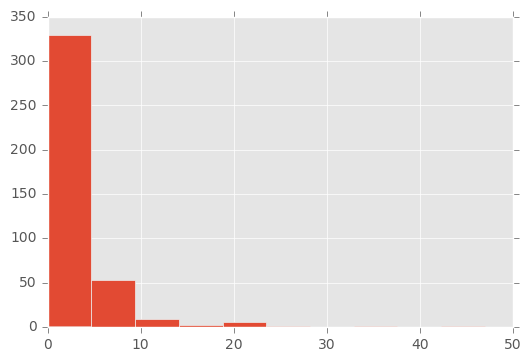

In [265]:
contrib["nombre"].hist()

In [266]:
contrib["jugement"].value_counts()

critique    275
neutre       86
positif      36
Name: jugement, dtype: int64

In [267]:
pd.crosstab(contrib["jugement"],contrib["type_reco"])

type_reco,indiv,others,recherche,syndic,univ
jugement,,,,,
critique,48,12,108,54,29
neutre,21,15,37,4,3
positif,10,4,13,0,2


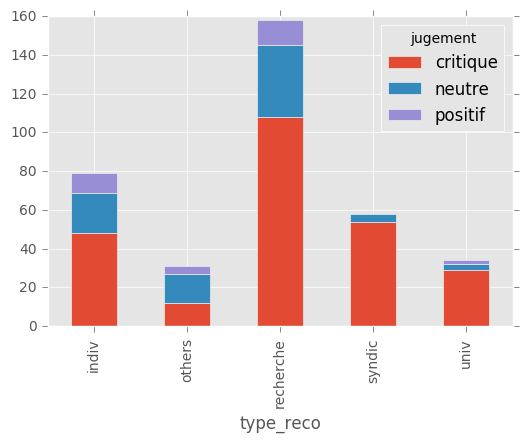

In [268]:
pd.crosstab(contrib["type_reco"],contrib["jugement"]).plot(kind="bar",stacked=True)

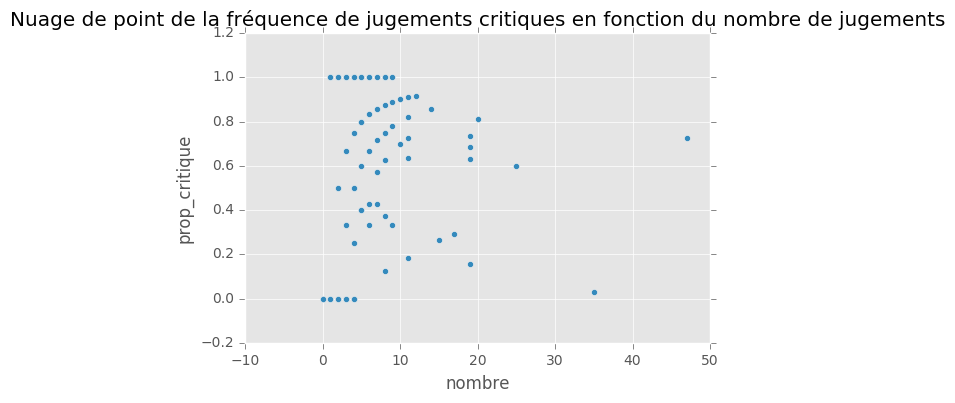

In [270]:
contrib.plot(kind="scatter",x="nombre",y="prop_critique")
plt.title("Nuage de point de la fréquence de jugements critiques en fonction du nombre de jugements")